Optimal Total Weight: 14 

Selected Edges in MST:
Edge: (3, 4), Weight: 1
Edge: (1, 3), Weight: 2
Edge: (4, 5), Weight: 2
Edge: (1, 2), Weight: 3
Edge: (5, 7), Weight: 3
Edge: (4, 6), Weight: 3




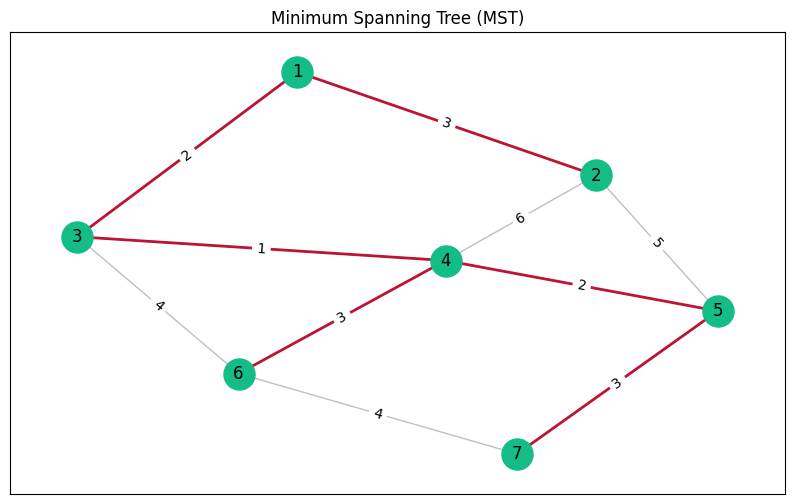

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

class UnionFind:
    """Union-Find structure to manage connected components."""

    def __init__(self, nodes):
        # Initialize each node as its own parent (self-loop) for disjoint sets
        self.parent = {node: node for node in nodes}

    def find(self, node):
        # Find the root of the node with path compression for efficiency
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])  # Path compression
        return self.parent[node]

    def union(self, node1, node2):
        # Connect the roots of the two nodes to unify their components
        root1 = self.find(node1)
        root2 = self.find(node2)
        if root1 != root2:
            self.parent[root2] = root1


def solve_MST_with_kruskal(nodes, edges):
    """
    Solves the MST problem using Kruskal's algorithm.

    Parameters:
    - nodes (list of ints): List of node identifiers.
    - edges (dict): Dictionary with (node1, node2) tuples as keys and weights as values.
    """
    # Sort edges by weight to ensure MST is minimum weight
    sorted_edges = sorted(edges.items(), key=lambda x: x[1])
    union_find = UnionFind(nodes)  # Initialize Union-Find structure for cycle detection

    mst_edges = []  # List to store edges in the MST
    total_weight = 0  # Accumulate total MST weight

    # Iterate through sorted edges to build the MST
    for (node1, node2), weight in sorted_edges:
        if union_find.find(node1) != union_find.find(node2):  # Check for cycles
            mst_edges.append((node1, node2, weight))  # Add edge to MST
            total_weight += weight  # Add weight to total
            union_find.union(node1, node2)  # Merge components
            if len(mst_edges) == len(nodes) - 1:  # Stop if MST is complete
                break

    # Display the total weight and selected edges in MST
    print("Optimal Total Weight:", total_weight, "\n")
    print("Selected Edges in MST:")
    for edge in mst_edges:
        print(f"Edge: ({edge[0]}, {edge[1]}), Weight: {edge[2]}")
    print("\n")

    # Plot the MST for visual understanding
    plot_mst(nodes, edges, mst_edges)


def plot_mst(nodes, edges, mst_edges):
    """
    Plots the Minimum Spanning Tree with all edges shown, MST edges highlighted.

    Parameters:
    - nodes (list): List of node identifiers.
    - edges (dict): All edges with weights.
    - mst_edges (list): MST edges as (node1, node2, weight).
    """
    # Set figure size for better visibility
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed

    # Create a graph and add nodes and edges
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for (node1, node2), weight in edges.items():
        G.add_edge(node1, node2, weight=weight)

    # Extract positions for nodes using a spring layout for visual clarity
    pos = nx.spring_layout(G, seed=42)

    # Draw all edges with light color and thinner lines for background
    nx.draw_networkx_edges(G, pos, edgelist=edges.keys(), width=1, alpha=0.5, edge_color="gray")

    # Highlight MST edges with a different color and thicker lines
    mst_edge_list = [(edge[0], edge[1]) for edge in mst_edges]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, width=2, edge_color="#bd1435", label="MST Edges")

    # Draw nodes with custom size and color for better visibility
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="#14bd87")
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

    # Add edge labels to display the weights
    edge_labels = {edge: f"{weight}" for edge, weight in edges.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Display the plot with title
    plt.title("Minimum Spanning Tree (MST)")
    plt.show()


# Example usage
if __name__ == "__main__":
    nodes = [1, 2, 3, 4, 5, 6, 7]
    edges = {
        (1, 2): 3,
        (1, 3): 2,
        (2, 4): 6,
        (2, 5): 5,
        (3, 4): 1,
        (3, 6): 4,
        (4, 5): 2,
        (5, 7): 3,
        (6, 7): 4,
        (4, 6): 3
    }

    solve_MST_with_kruskal(nodes, edges)